# BP Neural Network
Back Propagation Neural Network

## Model
一个全连接的神经网络

输入为：
$$\def\bm{\boldsymbol} \bm x=(x_1,...,x_n)^T$$

输出为：
$$\bm y=(y_1,...,y_n)^T$$

中间变量：
$$\bm u^{(i)}=(u_1^{(i)},...,u_n^{(i)})^T$$


$$\bm z^{(i)}=(z_1^{(i)},...,z_n^{(i)})^T$$

ReLu（非线性函数）：
$$ f(x)=
\begin{cases} 
x,  & \text{if }x\ge 0 \\
0, & \text{if }x<0
\end{cases}
$$

Forward Pass 前向传播：
$$
\begin{align}
\bm u^{(1)} &= W^{(1)}\bm x \\ \\
\bm z^{(1)} &= f(u^{(1)}) \\ \\
\bm u^{(i)} &= W^{(i)}\bm z^{(i-1)} \\ \\
\bm z^{(i)} &= f(u^{(i)}) \\ \\
y &= W^{(m+1)} \bm z^{(m)}
\end{align}
$$
注意：这里为了推导便利省略了常数项

## Strategy

Loss Function 损失函数：

均方误差函数：

$$
Loss_{MSE}(y,y_{true}) = (y-y_{true})^2
$$

## Algorithm

Back Pass 反向传播：
$$
\frac{dLoss_{MSE}}{dy} = (y-y_{true})
$$

$$
\frac{dy}{dW^{(m+1)}} = {z^{(m)}}^T 
$$

$$
\frac{dy}{d\bm z^{(m)}} = {W^{(m+1)}}^T
$$

$$
\frac{d\bm z^{(i)}}{du^{(i)}} =
\begin{cases} 
1,  & \text{if }u^{(i)}\ge 0 \\
0, & \text{if }u^{(i)}<0
\end{cases}
$$

$$
\frac {d\bm u^{(i)}} {dW^{(i)}} = {z^{(i-1)}}^T
$$

$$
\frac {d\bm u^{(i)}} {dz^{(i-1)}} = {W^{(i)}}^T
$$

## 实现: 用 numpy 编写双层神经网络

一个全连接ReLu神经网络，一个隐藏层，没有bias，用来从x预测y，使用RMSE loss

* $u=\omega_1 X$

* $z=max(0,h)$

* $y_{pre}=\omega_2 z$

这一实现完全使用numpy手动完成以下三个步骤

* Foward pass 前向传播

* Loss 损失函数

* backward pass 反向传播

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import tqdm

In [59]:
N , D_in, H, D_out = 100, 3, 30, 1

# 训练集 y=✔x1^2+x2^2+x3^2
X = np.random.randn(N, D_in)
Y = np.sqrt(X[:,0]**2+X[:,1]**2+X[:,2]**2).reshape(N, D_out)

In [60]:
# 参数层
w1 = np.random.randn(D_in, H)
w2 = np.random.randn(H, D_out)

In [61]:
lr = 1e-4
lossList = []
for t in tqdm.trange(int(5e6)):
    # Forward pass
    u = X.dot(w1)
    z = np.maximum(u,0)
    y_pre = z.dot(w2)
    
    # Loss
    loss = ((y_pre - Y)**2).sum()/N/2
    if loss < 1e-3:
        break
    if t%10000 == 0:
        lossList.append(loss)
    
    # Backward pass : compute the gradient
    grad_y_pre = 1/N*(y_pre-Y)
    grad_w2 = z.T.dot(grad_y_pre)
    grad_z = grad_y_pre.dot(w2.T)
    grad_u = np.where(u>0, grad_z, 0)
    grad_w1 = X.T.dot(grad_u)
    
    # update weights of w1 and w2
    w1 -= lr * grad_w1
    w2 -= lr * grad_w2

 31%|█████████████████████▋                                               | 1568548/5000000 [01:00<02:12, 25882.30it/s]


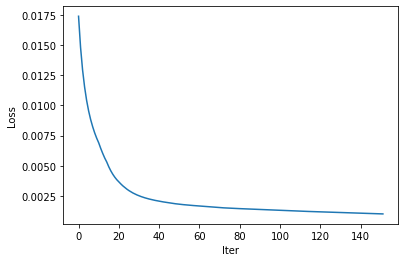

In [62]:
fig = plt.figure()
plt.plot(lossList[5:])
plt.xlabel('Iter')
plt.ylabel('Loss');